# Data Analysis of the Training Data

The motivation for this jupyter notebook is to answer the first question listed in the Marking Scheme:

1) *Data analysis of the training data* (15 marks): _For a written description on the training data. This should include:_
- *5 marks*: Analysis of the class labels: how frequently these are and how they correlate with any feature of the data, e.g. input length
- *10 marks*: Qualitative assessment of the dataset, considering either how hard or how subjective the task is, providing examples in your report

In [1]:
import pyarrow # required dependency of pandas
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt

## Loading Data

### Data analysis of the training data

Provides plots for frequency of features of data and their correlation with the final class prediction

- `train_semeval_parids-labels.csv`: [LABELS] contains the data allocation into the train set. _Since the dev set (see below) is used for reporting performance of models, we need to create an intenal dev set from within the training data for the purpose of hyper-parameter tuning._

- `dev_semval_parids-labels.csv`: [LABELS] contains the data allocation into the dev set . _Since the test data is held out, creating an additional internal dev set allows you to use the official dev set as the test set. This is the dataset that will be used to report our findings._

- `dontpatronizeme_pcl.tsv`: [DATA] contains the test data

- `task4_test.tsv`: contains the test set (without the labels) since the original test data is held out.

#### Don't Patronize Me Data Set

Information about the contents can be found at [this link](https://github.com/CRLala/NLPLabs-2024/blob/main/Dont_Patronize_Me_Trainingset/README.txt), in short:

- `par_id` is a unique id for each one of the paragraphs in the corpus.
- `art_id` is the document id in the original NOW corpus (News on Web: https://www.english-corpora.org/now/).
- `keyword` is the search term used to retrieve texts about a target community.
- `country_code` is a two-letter ISO Alpha-2 country code for the source media outlet.
- `text` is the paragraph containing the keyword.
- `label` is an integer between 0 and 4. Each paragraph has been annotated by two annotators as 0 (No PCL), 1 (borderline PCL) and 2 (contains PCL). The combined annotations have been used in the following graded scale:

    - 0 -> $A_1 = 0 \wedge A_2 = 0$
    - 1 -> $A_1 = 0 \wedge A_2 = 1$ OR $A_1 = 1 \wedge A_2 = 0$
    - 2 -> $A_1 = 1 \wedge A_2 = 1$
    - 3 -> $A_1 = 1 \wedge A_2 = 2$ OR $A_1 = 2 \wedge A_2 = 1$
    - 4 -> $A_1 = 2 \wedge A_2 = 2$

The experiments reported in the paper consider the following tag grouping: 
- {0,1}   = No PCL
- {2,3,4} = PCL

In [2]:
data_path = '../../data'

dont_patronize_me = pd.read_csv(f'{data_path}/dontpatronizeme_pcl.tsv', delimiter='\t', skiprows=4, header=None, names=['par_id','art_id','keyword','country_code', 'text','label'])
dont_patronize_me.shape

(10469, 6)

In [3]:
dont_patronize_me.loc[dont_patronize_me['label']==0].head(5)

,par_id,art_id,keyword,country_code,text,label
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0


In [4]:
dont_patronize_me.loc[dont_patronize_me['label']==1].head(5)

,par_id,art_id,keyword,country_code,text,label
8,9,@@3449225,homeless,ph,"NUEVA ERA , Ilocos Norte - No family shall be ...",1
35,36,@@20493025,homeless,ng,The foundation urged those who are willing to ...,1
37,38,@@19143133,hopeless,bd,Rizvi : There will be no joy this Eid <h> ' Th...,1
43,44,@@20860277,vulnerable,ng,Comrade David Kerigbo Ugondo was born to the f...,1
44,45,@@4002879,refugee,us,"Currently , what 's left to the Palestinian pe...",1


In [5]:
dont_patronize_me.loc[dont_patronize_me['label']==2].head(5)

,par_id,art_id,keyword,country_code,text,label
32,33,@@8301323,disabled,pk,Arshad said that besides learning many new asp...,2
148,149,@@1387882,disabled,us,Krueger recently harnessed that creativity to ...,2
170,171,@@18450304,women,bd,""" I am very excited to see the monetary result...",2
178,179,@@15574765,women,ca,"Jenny Neal , regional director of the Grandmot...",2
237,238,@@21800857,hopeless,bd,""" This system appears designed to make Rohingy...",2


In [6]:
dont_patronize_me.loc[dont_patronize_me['label']==3].head(5)

,par_id,art_id,keyword,country_code,text,label
33,34,@@24150149,disabled,ng,Fast food employee who fed disabled man become...,3
41,42,@@4591694,hopeless,jm,Vanessa had feelings of hopelessness in her fi...,3
76,77,@@22454828,homeless,nz,"In September , Major Nottle set off on foot fr...",3
82,83,@@4672144,homeless,pk,The demographics of Pakistan and India are ver...,3
106,107,@@16900972,homeless,ke,"His present "" chambers "" may be quite humble ,...",3


In [7]:
dont_patronize_me.loc[dont_patronize_me['label']==4].head(5)

,par_id,art_id,keyword,country_code,text,label
117,118,@@24885862,in-need,za,This is the rhetoric of what anthropologist La...,4
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4
186,187,@@24814760,in-need,bd,""" We share a global responsibility to respond ...",4
194,195,@@4478900,homeless,gb,Housing Minister Grant Shapps added : ' The pl...,4


In [8]:
dont_patronize_me.groupby('label').size().reset_index(name='count')

,label,count
0,0,8529
1,1,947
2,2,144
3,3,458
4,4,391


#### Parids-labels

These files contain mappings from a sentence id to a `(7,)` vector. The labels can be found at the [original research paper](https://aclanthology.org/2020.coling-main.518/) and from their [GitHub repository](https://github.com/Perez-AlmendrosC/dontpatronizeme/tree/master) where more details can be found with regards to their meaning. In short, the labels are:

- Unbalanced Power Relation
- Shallow solution
- Presupposition 
- Authority voice
- Metaphor
- Compassion
- The poorer, the merrier

This corresponds to the dont_patronize_me dataset where it encodes what type of patronizing language is used


In [9]:
# Loading the training labelled dataset

train = pd.read_csv(f'{data_path}/train_semeval_parids-labels.csv', delimiter=',')
train.shape

(8375, 2)

In [10]:
train.head(5)

,par_id,label
0,4341,"[1, 0, 0, 1, 0, 0, 0]"
1,4136,"[0, 1, 0, 0, 0, 0, 0]"
2,10352,"[1, 0, 0, 0, 0, 1, 0]"
3,8279,"[0, 0, 0, 1, 0, 0, 0]"
4,1164,"[1, 0, 0, 1, 1, 1, 0]"


In [11]:
# Loading the training labelled dataset

dev = pd.read_csv(f'{data_path}/dev_semeval_parids-labels.csv', delimiter=',')
dev.shape

(2094, 2)

In [12]:
train.shape[0] + dev.shape[0] == dont_patronize_me.shape[0]

True

#### Joined Data

In [13]:
detailed_labels = pd.concat([dev, train], ignore_index=True, join='inner', names=['simple', 'detailed'])
joined_df = pd.merge(dont_patronize_me, detailed_labels, on='par_id')
joined_df = joined_df.rename(columns={'label_x': 'label', 'label_y': 'label_detailed'})

In [14]:
joined_df.loc[joined_df['label']==0].head(5)

,par_id,art_id,keyword,country_code,text,label,label_detailed
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,"[0, 0, 0, 0, 0, 0, 0]"
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,"[0, 0, 0, 0, 0, 0, 0]"
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0,"[0, 0, 0, 0, 0, 0, 0]"
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,"[0, 0, 0, 0, 0, 0, 0]"
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0,"[0, 0, 0, 0, 0, 0, 0]"


In [15]:
joined_df.loc[joined_df['label']==4].head(5)

,par_id,art_id,keyword,country_code,text,label,label_detailed
117,118,@@24885862,in-need,za,This is the rhetoric of what anthropologist La...,4,"[1, 0, 0, 1, 0, 1, 0]"
153,154,@@20663936,disabled,ng,When some people feel causing problem for some...,4,"[0, 0, 1, 1, 1, 1, 0]"
156,157,@@21712008,poor-families,ca,We are alarmed to learn of your recently circu...,4,"[1, 1, 0, 0, 1, 1, 0]"
186,187,@@24814760,in-need,bd,""" We share a global responsibility to respond ...",4,"[1, 0, 0, 0, 0, 0, 0]"
194,195,@@4478900,homeless,gb,Housing Minister Grant Shapps added : ' The pl...,4,"[1, 0, 0, 1, 0, 0, 0]"


In [16]:
# Make a copy of the DataFrame to avoid SettingWithCopyWarning
test_assumption = joined_df[['label', 'label_detailed']].copy()

test_assumption['contains_1'] = [any(c == '1' for c in labellist) for labellist in joined_df['label_detailed']]
test_assumption['is_patronizing'] = False
test_assumption.loc[joined_df['label'].isin([2, 3, 4]), 'is_patronizing'] = True

if (test_assumption['contains_1'] == test_assumption['is_patronizing']).all():
    print('It is true that if there is at least one 1 in the detailed label then it is patronizing')
else:
    print('It is not true that a 1 in the label_detail denotes patronizing content')

It is true that if there is at least one 1 in the detailed label then it is patronizing


## Data Pre-processing

### Remove 'none' words, we assume that empty phrases are by default non-patronizing

In [17]:
joined_df[pd.isna(joined_df['text'])]

,par_id,art_id,keyword,country_code,text,label,label_detailed
8639,8640,@@16852855,migrant,ke,NaN,0,"[0, 0, 0, 0, 0, 0, 0]"


In [18]:
joined_df = joined_df.dropna(subset = 'text')
joined_df[pd.isna(joined_df['text'])]

,par_id,art_id,keyword,country_code,text,label,label_detailed


### Add column for 'is_patronizing' for simplicity of future binary classification

In [19]:
joined_df.loc[:, 'is_patronizing'] = False
joined_df.loc[joined_df['label'].isin([2,3,4]), 'is_patronizing'] = True
joined_df.head(5)

,par_id,art_id,keyword,country_code,text,label,label_detailed,is_patronizing
0,1,@@24942188,hopeless,ph,"We 're living in times of absolute insanity , ...",0,"[0, 0, 0, 0, 0, 0, 0]",False
1,2,@@21968160,migrant,gh,"In Libya today , there are countless number of...",0,"[0, 0, 0, 0, 0, 0, 0]",False
2,3,@@16584954,immigrant,ie,White House press secretary Sean Spicer said t...,0,"[0, 0, 0, 0, 0, 0, 0]",False
3,4,@@7811231,disabled,nz,Council customers only signs would be displaye...,0,"[0, 0, 0, 0, 0, 0, 0]",False
4,5,@@1494111,refugee,ca,""" Just like we received migrants fleeing El Sa...",0,"[0, 0, 0, 0, 0, 0, 0]",False


In [20]:
# Check condition for labels 2, 3, or 4
condition_2_3_4 = ~((joined_df['label'].isin([2, 3, 4])) & (joined_df['is_patronizing'] == False)).any()

# Check condition for labels 0 or 1
condition_0_1 = ~((joined_df['label'].isin([0, 1])) & (joined_df['is_patronizing'] == True)).any()

# Check if both conditions are True
if condition_2_3_4 and condition_0_1:
    print("Conditions are satisfied: No labels 2, 3, or 4 with 'is_patronizing' False and vice versa for labels 0 or 1.")
else:
    print("Conditions are not satisfied: Some labels do not meet the specified criteria.")

Conditions are satisfied: No labels 2, 3, or 4 with 'is_patronizing' False and vice versa for labels 0 or 1.


## Data Analysis

### Data distribution

#### Count how many of each label class there is and plot it

In [21]:
# idea: balance out class labels by applying synonyms for adjectives
label_counts = joined_df.groupby(by='label')['label'].count()
label_counts

label
0    8528
1     947
2     144
3     458
4     391
Name: label, dtype: int64

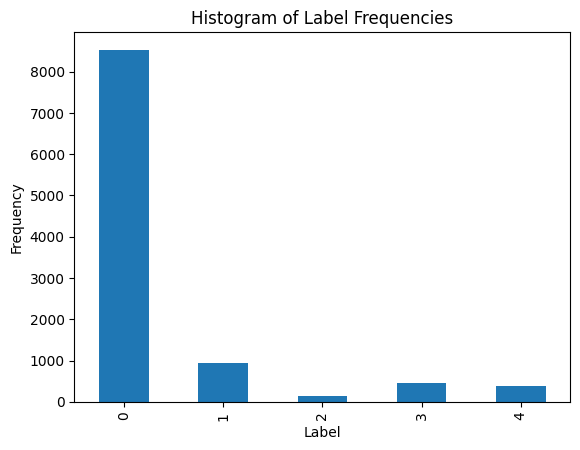

In [22]:
# Plotting histogram
label_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Frequencies')

# Display the plot
plt.show()

#### Count how many of each patronizing binary classification there are

In [23]:
patronizing_counts = joined_df.groupby(by='is_patronizing')['is_patronizing'].count()
patronizing_counts

is_patronizing
False    9475
True      993
Name: is_patronizing, dtype: int64

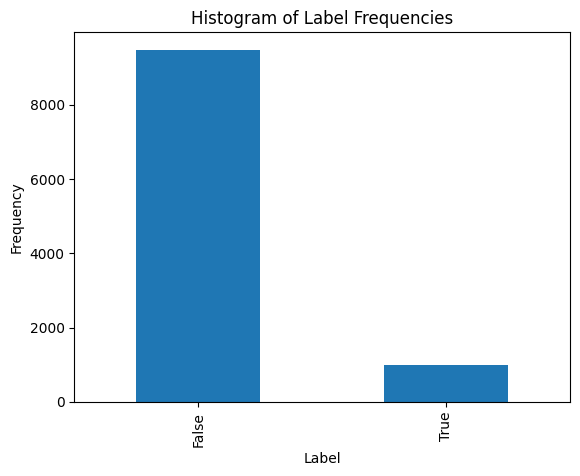

In [24]:
# Plotting histogram
patronizing_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Frequencies')

# Display the plot
plt.show()


#### Count how many keyword classes there are

In [25]:
keyword_counts = joined_df.groupby(by='keyword')['keyword'].count()
keyword_counts

keyword
disabled         1028
homeless         1077
hopeless         1005
immigrant        1061
in-need          1082
migrant          1088
poor-families     909
refugee          1068
vulnerable       1080
women            1070
Name: keyword, dtype: int64

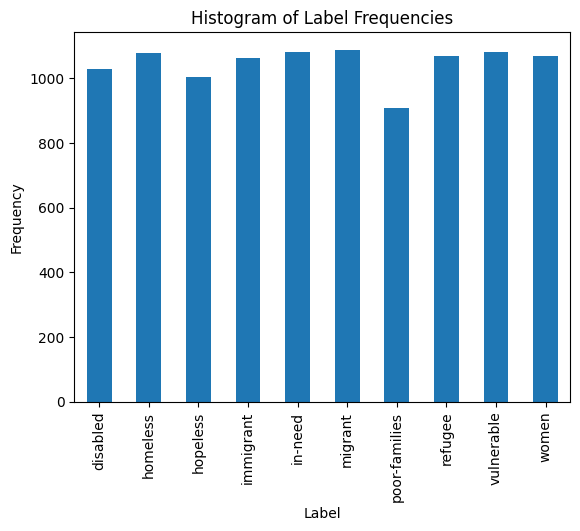

In [26]:
# Plotting histogram
keyword_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Frequencies')

# Display the plot
plt.show()


#### Number of countries

In [27]:
country_counts = joined_df.groupby(by='country_code')['country_code'].count()
country_counts

country_code
au    541
bd    512
ca    530
gb    540
gh    523
hk    490
ie    537
in    530
jm    490
ke    538
lk    504
my    546
ng    537
nz    518
ph    545
pk    545
sg    535
tz    415
us    543
za    549
Name: country_code, dtype: int64

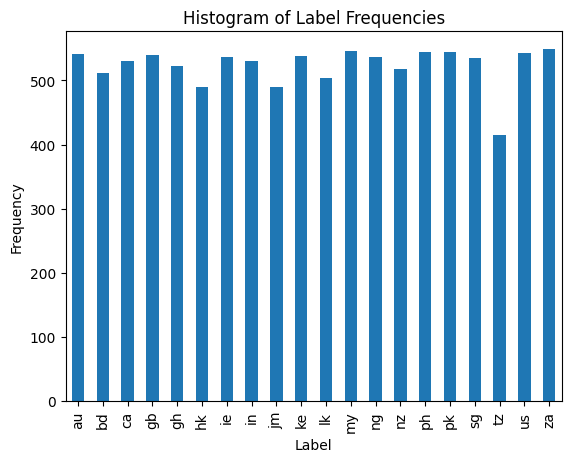

In [28]:
# Plotting histogram
country_counts.plot(kind='bar')

# Adding labels and title
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.title('Histogram of Label Frequencies')

# Display the plot
plt.show()


### Word frequency analysis

In [29]:
# Count word frequency per label_simple

# Obtain word count
word_frequency_analysis = joined_df[['text', 'label', 'is_patronizing']]
word_frequency_analysis.loc[:, ('text')] = joined_df['text'].str.lower().str.split(' ', expand=False)
word_frequency_analysis.loc[:, ('text')] = word_frequency_analysis['text'].apply(lambda x: Counter(x))

def foo(x):
    result = Counter()
    for d in x:
        result += Counter(d)
    return dict(sorted(result.items(), key=lambda item: item[1], reverse=True))

# group by label
word_freq_by_label = word_frequency_analysis.groupby('label')['text'].agg(foo).reset_index()

In [30]:
# word_freq_by_label[word_freq_by_label['label'] == 0]['text'].iloc[0]
word_freq_by_label

,label,text
0,0,"{'the': 20744, ',': 17284, '.': 14485, 'of': 1..."
1,1,"{'the': 2470, ',': 2142, '.': 1851, 'to': 1458..."
2,2,"{'the': 342, ',': 269, '.': 251, 'to': 213, 'a..."
3,3,"{'the': 1167, ',': 988, '.': 853, 'to': 717, '..."
4,4,"{'the': 1124, ',': 1022, '.': 813, 'to': 718, ..."


In [31]:
worf_freq_by_patronizing = word_frequency_analysis.groupby('is_patronizing')['text'].agg(foo).reset_index()
worf_freq_by_patronizing

,is_patronizing,text
0,False,"{'the': 23214, ',': 19426, '.': 16336, 'to': 1..."
1,True,"{'the': 2633, ',': 2279, '.': 1917, 'to': 1648..."


In [32]:
worf_freq_by_patronizing[worf_freq_by_patronizing['is_patronizing'] == False]['text'].iloc[0]

{'the': 23214,
 ',': 19426,
 '.': 16336,
 'to': 12468,
 'of': 12390,
 'and': 11271,
 'in': 9930,
 'a': 8155,
 '"': 5301,
 'for': 4347,
 'that': 4335,
 'is': 3985,
 'on': 3012,
 'are': 2984,
 "'s": 2826,
 'as': 2685,
 'with': 2665,
 'it': 2323,
 'from': 2316,
 'have': 2081,
 'was': 2080,
 'by': 2016,
 'be': 1992,
 'said': 1965,
 'their': 1845,
 'at': 1795,
 'has': 1733,
 'they': 1713,
 'who': 1712,
 'not': 1623,
 'he': 1605,
 'people': 1584,
 'women': 1560,
 'this': 1522,
 'an': 1431,
 'but': 1283,
 'were': 1279,
 'i': 1257,
 'immigrants': 1249,
 'we': 1221,
 'or': 1186,
 'will': 1156,
 'more': 1137,
 'families': 1129,
 "'": 1113,
 'need': 1106,
 'vulnerable': 1105,
 ')': 1099,
 '(': 1088,
 'his': 1031,
 'disabled': 1019,
 'which': 1002,
 'been': 971,
 '--': 945,
 'poor': 941,
 'also': 904,
 'refugees': 869,
 'about': 866,
 'had': 858,
 'homeless': 853,
 'all': 841,
 'children': 839,
 'them': 833,
 'one': 827,
 'there': 815,
 'you': 795,
 'can': 774,
 '?': 773,
 'she': 762,
 'government

In [33]:
not_patronizing_words = worf_freq_by_patronizing[worf_freq_by_patronizing['is_patronizing'] == False]['text'].iloc[0]
patronizing_words = worf_freq_by_patronizing[worf_freq_by_patronizing['is_patronizing'] == True]['text'].iloc[0]
strictly_patronizing_words = dict(sorted({ k : patronizing_words[k] for k in set(patronizing_words) - set(not_patronizing_words) }.items(), key=lambda item: item[1], reverse=True))
strictly_patronizing_words

{'fasting': 5,
 'volunteerism': 4,
 'yong': 4,
 'dedication': 4,
 'wayside': 3,
 'hailing': 3,
 'impairment': 3,
 'papal': 3,
 'dinu': 3,
 'imo': 3,
 'poverty-stricken': 3,
 'sinful': 3,
 'huddled': 3,
 'akka': 3,
 'betty': 3,
 'sabc': 3,
 'honored': 3,
 'evans': 3,
 'pellets': 2,
 'evros': 2,
 'kitchens': 2,
 'maniacal': 2,
 'deformities': 2,
 'washes': 2,
 'almsgiving': 2,
 'daraz': 2,
 'incomparable': 2,
 'avengers': 2,
 'onyx': 2,
 'bitterly': 2,
 'vidisha': 2,
 'gloves': 2,
 'dispense': 2,
 'tampons': 2,
 'sixties': 2,
 'jayathilake': 2,
 'exudes': 2,
 'platfontein': 2,
 'ghiz': 2,
 'cheer': 2,
 'filmaid': 2,
 'selflessly': 2,
 'kickstart': 2,
 'idearaya': 2,
 'crp': 2,
 'kasun': 2,
 'shumugum': 2,
 'okorocha': 2,
 'soberano': 2,
 'manamela': 2,
 'alpha': 2,
 'nlt': 2,
 'redirect': 2,
 'wcic': 2,
 'abah': 2,
 'enveloped': 2,
 'invigorating': 2,
 'annie': 2,
 'atinka': 2,
 'mcclean': 2,
 'motsepe': 2,
 'sasha': 2,
 'tte': 2,
 'juxtaposition': 2,
 'eco-friendly': 2,
 'balaji': 2,
 '

In [82]:
# Checking that it is indeed the right way around

for patronizing_word in (list(strictly_patronizing_words)[0], 'lovely', 'honored', 'dedication'):
    print('===Extracting tweets containing: ' + patronizing_word + '===')
    for index, row in joined_df[joined_df['text'].str.contains(patronizing_word)][['text', 'is_patronizing']].iterrows():
        text = row['text']
        is_patronizing = row['is_patronizing']
        print(index, is_patronizing, text)

===Extracting tweets containing: fasting===
3024 True From a spiritual perspective , fasting is a time for the believer to rely on God , to give thanks and to think of others who are in need .
3923 True " I believe the situation will worsen during the fasting month when more people are keen to donate food to the poor families , including those in the cities , " Lee said .
8938 True In the course of the coming week , the season of Lent begins . It is a time for renewal for each one of us , a time to draw closer to the Lord so that he may pick us up and set us again on his pathway to the fullness of life . The steps we are invited to take during Lent include the three traditional Lenten practices : prayer , fasting and almsgiving . We are to make these practices a more constant part of our life and behaviour throughout these next five and a half weeks . Through daily prayer we open our hearts to the Lord ; through fasting , or self-denial , we quieten the clamour within us for self-indul

In [83]:
joined_df.iloc[2404]

par_id                                                         2405
art_id                                                    @@1415929
keyword                                                     in-need
country_code                                                     us
text              We think it 's lovely that so many have come f...
label                                                             3
label_detailed                                [1, 0, 0, 0, 0, 0, 0]
is_patronizing                                                 True
Name: 2404, dtype: object

### Length Analysis

In [35]:
def plot_histogram_for_sentence_length(dataset, labels):
    """Plots a histogram for a specific label(s)"""
    # Create a new figure
    plt.figure(figsize=(10, 6))    

    # Loop through unique labels and plot the data
    for label, data in dataset[dataset['label'].isin(labels)].groupby('label'):
        plt.hist(data['text'], bins=50, alpha=0.5, label=label)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Text Length Distribution by Label')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [79]:
def plot_histogram_for_sentence_length_by_patronizing(dataset, clip):
    """Plot histogram for text length by patronizing labels"""

    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Loop through unique labels and plot the data
    for label, data in dataset.groupby('is_patronizing'):
        values = data['text'].loc[lambda x: x < clip]
        plt.hist(values, bins=50, alpha=0.5, label=f'Label {label}')
    # Set labels and title
    plt.xlabel('Text Length')
    plt.ylabel('Frequency')
    plt.title('Text Length Distribution')

    # Add legend
    plt.legend()

    # Show the plot
    plt.show()


In [37]:
def plot_line_bar_for_sentence_length(dataset, labels=[0,1,2,3,4]):
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot individual data points on the number line
    for index, row in dataset.loc[dataset['label'].isin(labels)].iterrows():
        plt.plot(row['text'], row['label'], 'o', color='C0', alpha=0.7)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.yticks([0, 1, 2, 3, 4])  # Set y-axis ticks to label names
    plt.ylabel('Label')
    plt.title('Text Length Distribution by Label')

    # Show the plot
    plt.show()

In [55]:
def plot_line_bar_for_sentence_length_by_patronizing(dataset):
    # Create a new figure
    plt.figure(figsize=(10, 6))

    # Plot individual data points on the number line
    for _, row in dataset.iterrows():
        label = 'Patronizing' if row['is_patronizing'] else 'Not Patronizing'
        value = row['text']
        if value <= 2000:
            plt.plot(value, 1 if row['is_patronizing'] else 0, 'o', label=label, color='C0', alpha=0.7)

    # Set labels and title
    plt.xlabel('Text Length')
    plt.yticks([0, 1], ['Not Patronizing', 'Patronizing'])  # Set y-axis ticks to label names
    plt.ylabel('Label')
    plt.title('Text Length Distribution by Patronizing')

    # tighten gap
    plt.ylim(-1, 2)

    # Show the plot
    plt.show()

#### Character Count

In [39]:
character_count = joined_df[['par_id', 'text', 'label','is_patronizing']]
character_count.loc[:, ('text')] = character_count['text'].apply(lambda x: len(x))
# pd.merge(joined_df, character_count, on='par_id').iloc[0][['text_x']]

character_count.sort_values(by='text')

,par_id,text,label,is_patronizing
1656,1657,8,0,False
9063,9064,16,1,False
8079,8080,18,0,False
1954,1955,18,0,False
6020,6021,20,1,False
...,...,...,...,...
292,293,1500,0,False
8191,8192,2240,0,False
5977,5978,2336,1,False
6832,6833,2776,4,True


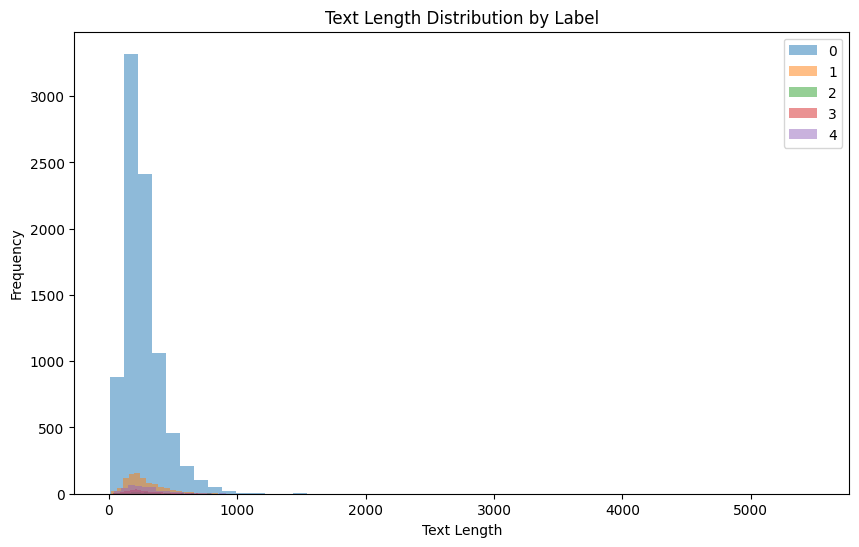

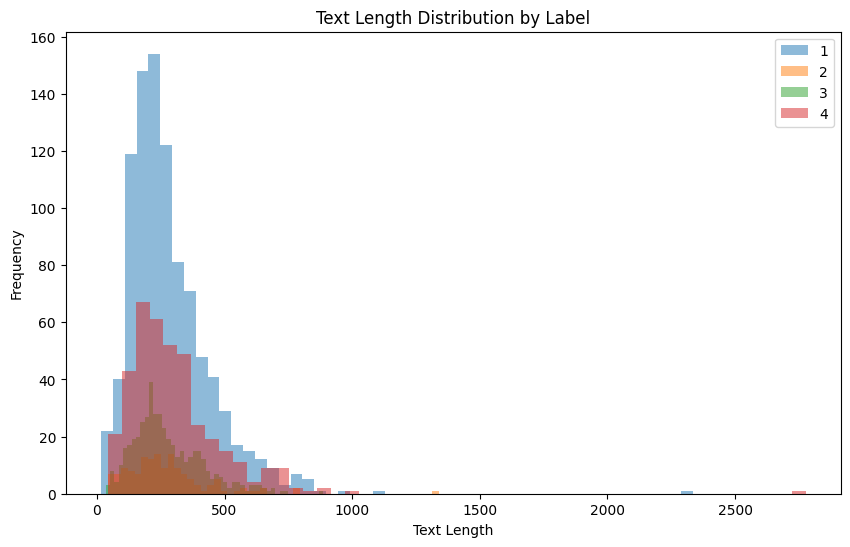

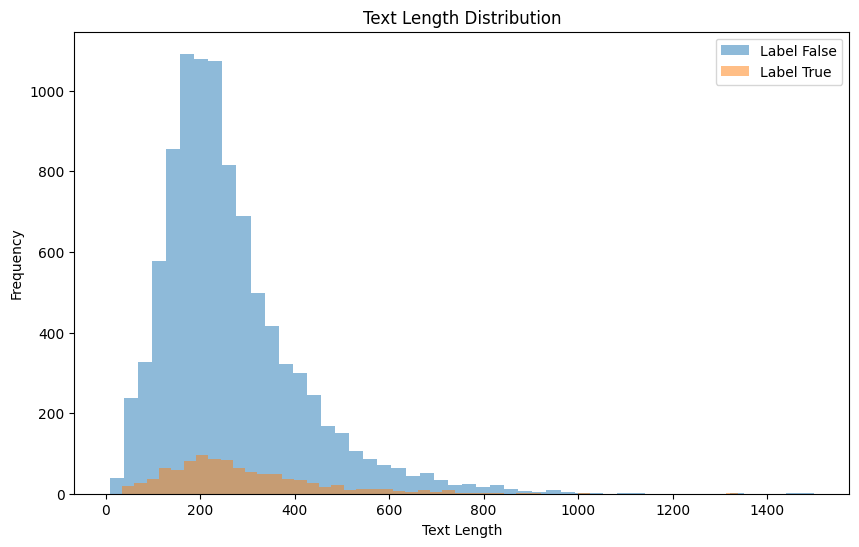

In [80]:
plot_histogram_for_sentence_length(character_count, [0,1,2,3,4])
plot_histogram_for_sentence_length(character_count, [1,2,3,4])
plot_histogram_for_sentence_length_by_patronizing(character_count, 2000)

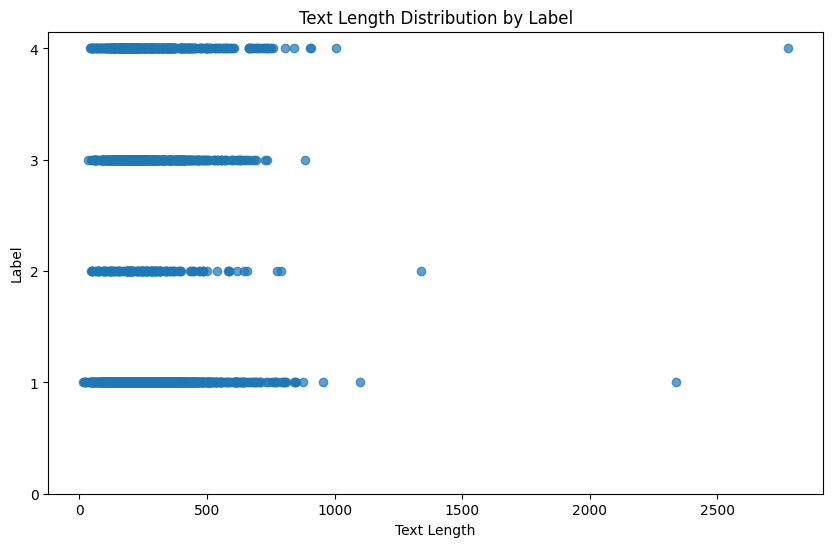

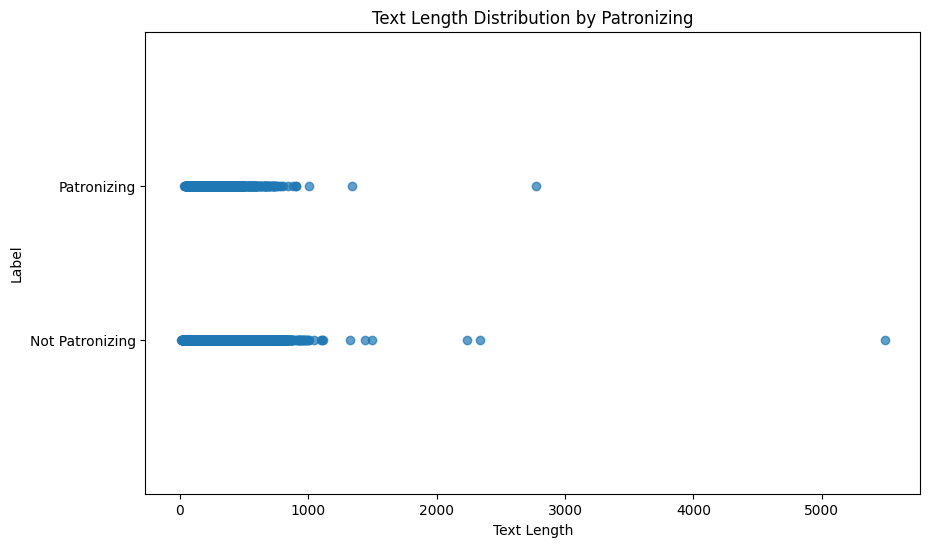

In [41]:
plot_line_bar_for_sentence_length(character_count, [1,2,3,4])
plot_line_bar_for_sentence_length_by_patronizing(character_count)

#### Word count

In [42]:
word_count = joined_df[['par_id', 'text', 'label', 'is_patronizing']]
word_count.loc[:, ('text')] = word_count['text'].apply(lambda x: len(x.split(' ')))

word_count.sort_values(by='text')

,par_id,text,label,is_patronizing
1656,1657,1,0,False
9063,9064,2,1,False
6020,6021,3,1,False
1954,1955,3,0,False
317,318,3,0,False
...,...,...,...,...
9810,9811,272,0,False
8191,8192,390,0,False
5977,5978,419,1,False
6832,6833,512,4,True


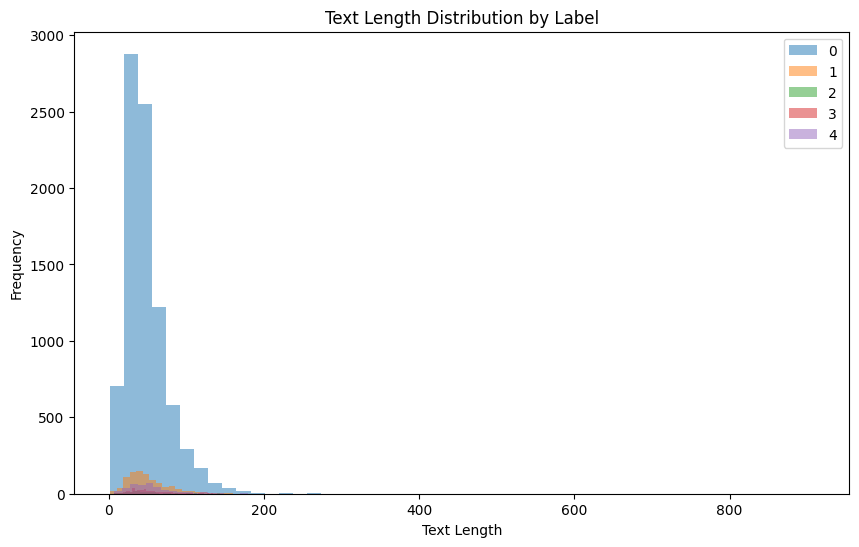

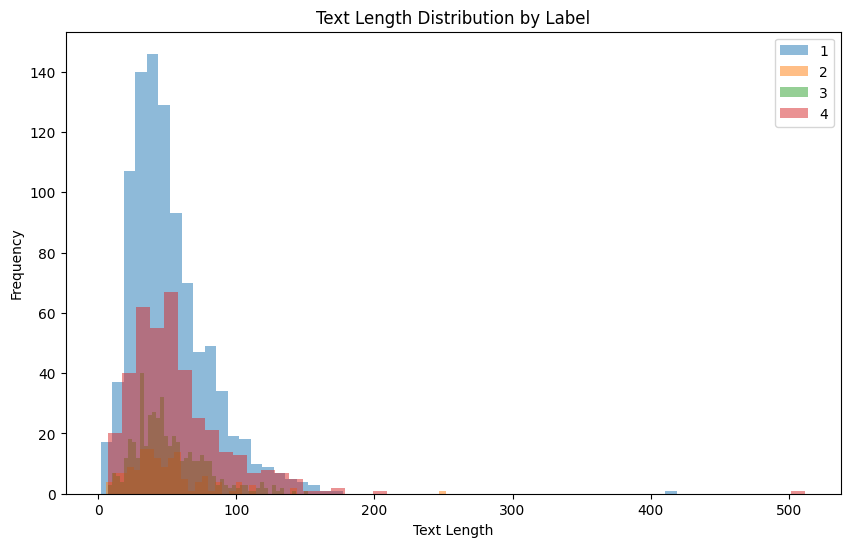

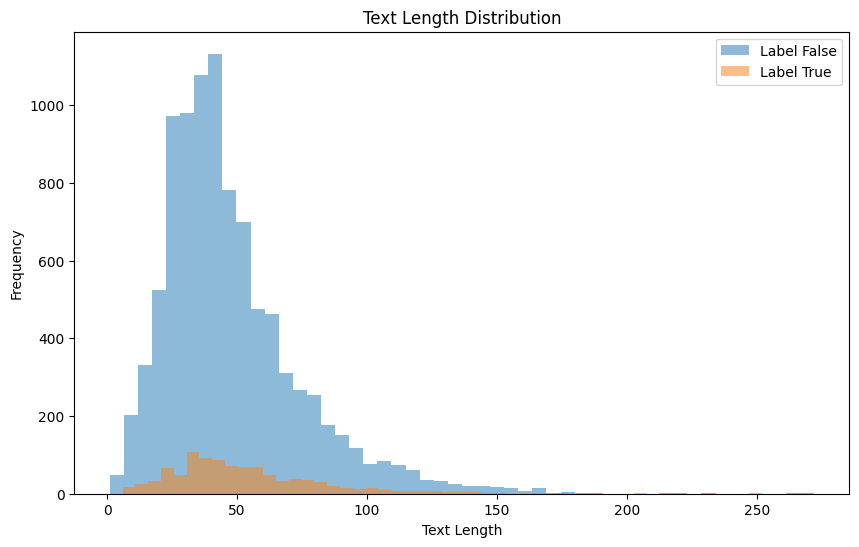

In [81]:
plot_histogram_for_sentence_length(word_count, labels=[0,1,2,3,4])
plot_histogram_for_sentence_length(word_count, labels=[1,2,3,4])
plot_histogram_for_sentence_length_by_patronizing(word_count, 300)

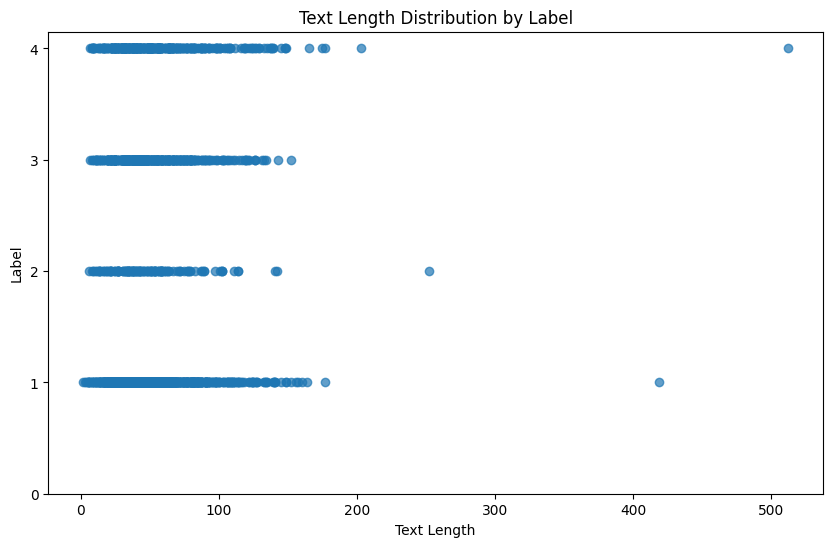

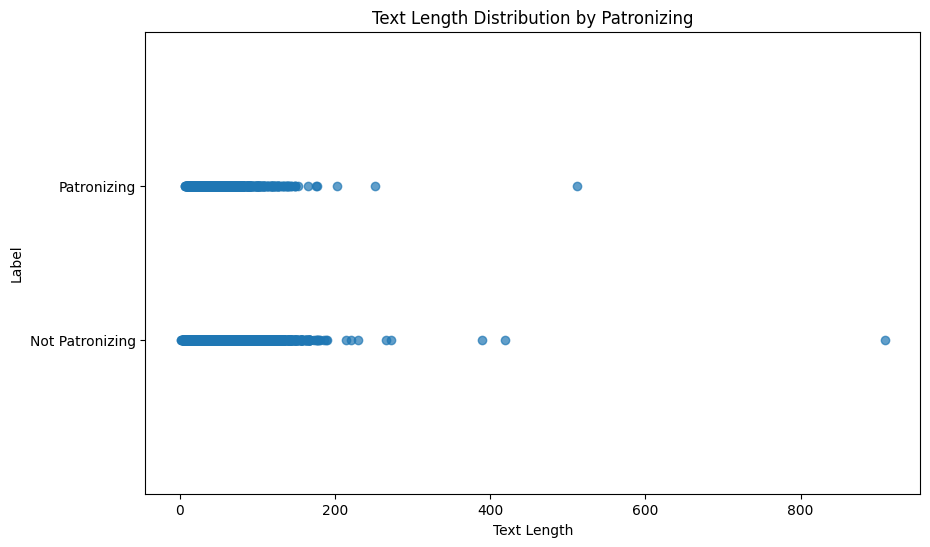

In [44]:
plot_line_bar_for_sentence_length(word_count, [1,2,3,4])
plot_line_bar_for_sentence_length_by_patronizing(word_count)

#### Word Count vs Char Count

Is there any trend when plotting number of characters vs number of word count for ALL training examples?

In [45]:
character_count, word_count

(       par_id text  label  is_patronizing
 0           1  620      0           False
 1           2  237      0           False
 2           3  158      0           False
 3           4  162      0           False
 4           5  273      0           False
 ...       ...  ...    ...             ...
 10464   10465  344      1           False
 10465   10466  258      0           False
 10466   10467  282      3            True
 10467   10468  496      4            True
 10468   10469  164      3            True
 
 [10468 rows x 4 columns],
        par_id text  label  is_patronizing
 0           1  123      0           False
 1           2   41      0           False
 2           3   27      0           False
 3           4   30      0           False
 4           5   53      0           False
 ...       ...  ...    ...             ...
 10464   10465   64      1           False
 10465   10466   43      0           False
 10466   10467   58      3            True
 10467   10468  107      

In [46]:
words_vs_chars = pd.merge(character_count, word_count, on=['par_id', 'label', 'is_patronizing'])
words_vs_chars.rename(columns={'text_x':'char_count', 'text_y':'word_count'}, inplace=True)
words_vs_chars

,par_id,char_count,label,is_patronizing,word_count
0,1,620,0,False,123
1,2,237,0,False,41
2,3,158,0,False,27
3,4,162,0,False,30
4,5,273,0,False,53
...,...,...,...,...,...
10463,10465,344,1,False,64
10464,10466,258,0,False,43
10465,10467,282,3,True,58
10466,10468,496,4,True,107


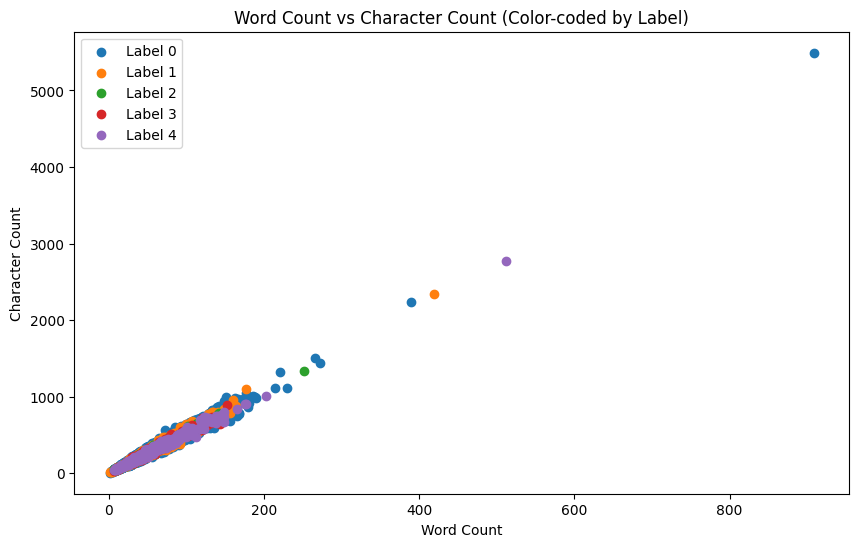

In [47]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))

for label in words_vs_chars['label'].unique():
    subset = words_vs_chars[words_vs_chars['label'] == label]
    plt.scatter(x=subset['word_count'], y=subset['char_count'], label=f'Label {label}')

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.title('Word Count vs Character Count (Color-coded by Label)')

# Add a colorbar
plt.legend()

# Show the plot
plt.show()

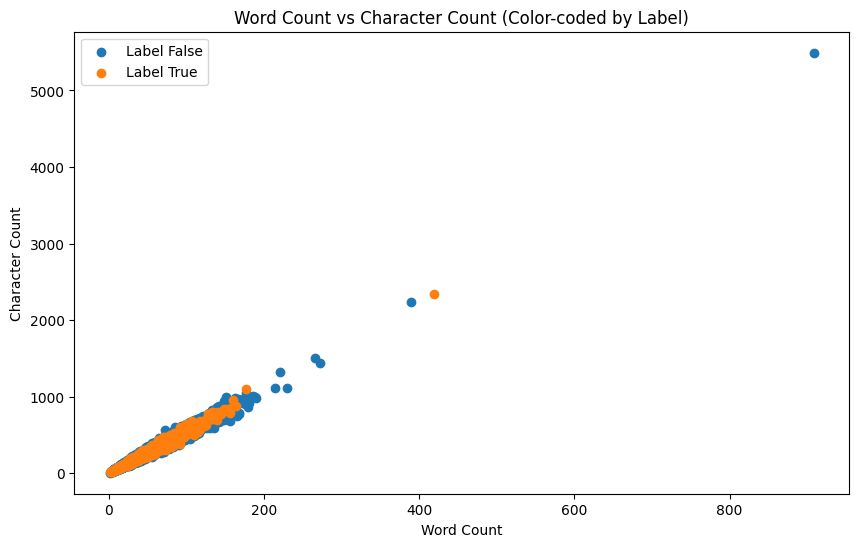

In [48]:
# Plot the scatter plot
plt.figure(figsize=(10, 6))

for label in words_vs_chars['is_patronizing'].unique():
    subset = words_vs_chars[words_vs_chars['label'] == label]
    plt.scatter(x=subset['word_count'], y=subset['char_count'], label=f'Label {label}')

# Add labels and title
plt.xlabel('Word Count')
plt.ylabel('Character Count')
plt.title('Word Count vs Character Count (Color-coded by Label)')

# Add a colorbar
plt.legend()

# Show the plot
plt.show()

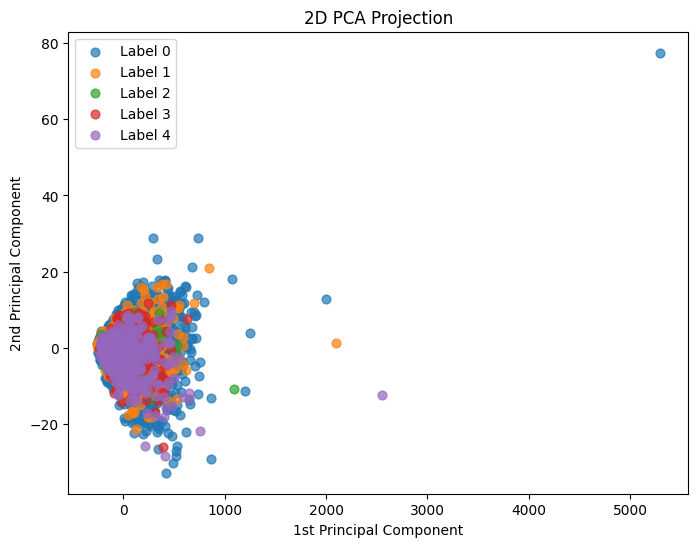

In [49]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming words_vs_chars is your DataFrame
# Rename the columns
words_vs_chars.rename(columns={'text_x': 'char_count', 'text_y': 'word_count'}, inplace=True)

# Perform PCA with 2 components
X_reduced = PCA(n_components=2).fit_transform(words_vs_chars[['word_count', 'char_count']])

# Plot the scatter plot in 2D with changed alpha and separate scatter plots for each label
plt.figure(figsize=(8, 6))

# Iterate through unique labels and plot each separately with a distinct label
for label in words_vs_chars['label'].unique():
    subset = words_vs_chars[words_vs_chars['label'] == label]
    plt.scatter(
        X_reduced[subset.index, 0],
        X_reduced[subset.index, 1],
        label=f'Label {label}',
        alpha=0.7,  # Change the alpha value here
        s=40
    )

# Add labels and title
plt.title("2D PCA Projection")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

# Add legend
plt.legend()

# Show the plot
plt.show()


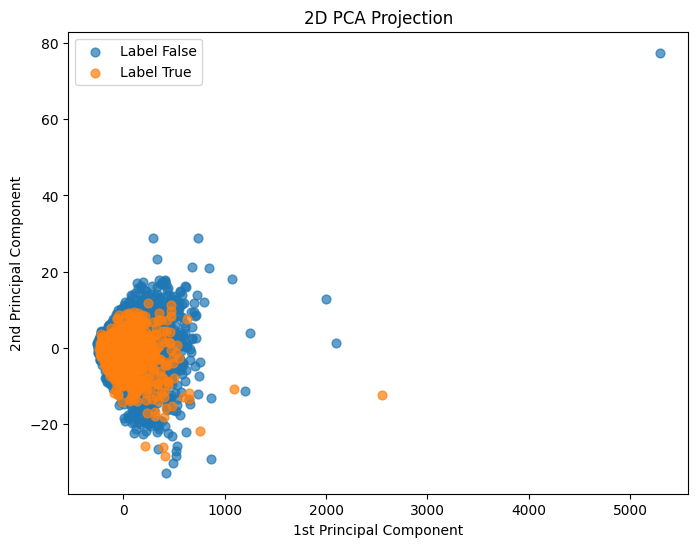

In [50]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming words_vs_chars is your DataFrame
# Rename the columns
words_vs_chars.rename(columns={'text_x': 'char_count', 'text_y': 'word_count'}, inplace=True)

# Perform PCA with 2 components
X_reduced = PCA(n_components=2).fit_transform(words_vs_chars[['word_count', 'char_count']])

# Plot the scatter plot in 2D with changed alpha and separate scatter plots for each label
plt.figure(figsize=(8, 6))

# Iterate through unique labels and plot each separately with a distinct label
for is_patronizing in words_vs_chars['is_patronizing'].unique():
    subset = words_vs_chars[words_vs_chars['is_patronizing'] == is_patronizing]
    plt.scatter(
        X_reduced[subset.index, 0],
        X_reduced[subset.index, 1],
        label=f'Label {is_patronizing}',
        alpha=0.7,  # Change the alpha value here
        s=40
    )

# Add labels and title
plt.title("2D PCA Projection")
plt.xlabel("1st Principal Component")
plt.ylabel("2nd Principal Component")

# Add legend
plt.legend()

# Show the plot
plt.show()
